In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [21]:
df = pd.read_csv(r"fifa_players.csv")
df.head()

,wage_eur,age,height_cm,weight_kg,nationality_name,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,320000.0,34.0,170.0,72.0,b'Argentina',93.0,93.0,85.0,95.0,70.0,...,91.0,94.0,95.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,270000.0,32.0,185.0,81.0,b'Poland',92.0,92.0,71.0,95.0,90.0,...,77.0,93.0,82.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,270000.0,36.0,187.0,83.0,b'Portugal',91.0,91.0,87.0,95.0,90.0,...,86.0,94.0,74.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,270000.0,29.0,175.0,68.0,b'Brazil',91.0,91.0,85.0,83.0,63.0,...,96.0,89.0,84.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,350000.0,30.0,181.0,70.0,b'Belgium',91.0,91.0,94.0,82.0,55.0,...,79.0,91.0,78.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19178 entries, 0 to 19177
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   wage_eur                    19178 non-null  float64
 1   age                         19178 non-null  float64
 2   height_cm                   19178 non-null  float64
 3   weight_kg                   19178 non-null  float64
 4   nationality_name            19178 non-null  object 
 5   overall                     19178 non-null  float64
 6   potential                   19178 non-null  float64
 7   attacking_crossing          19178 non-null  float64
 8   attacking_finishing         19178 non-null  float64
 9   attacking_heading_accuracy  19178 non-null  float64
 10  attacking_short_passing     19178 non-null  float64
 11  attacking_volleys           19178 non-null  float64
 12  skill_dribbling             19178 non-null  float64
 13  skill_curve                 191

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_7520\1426671555.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

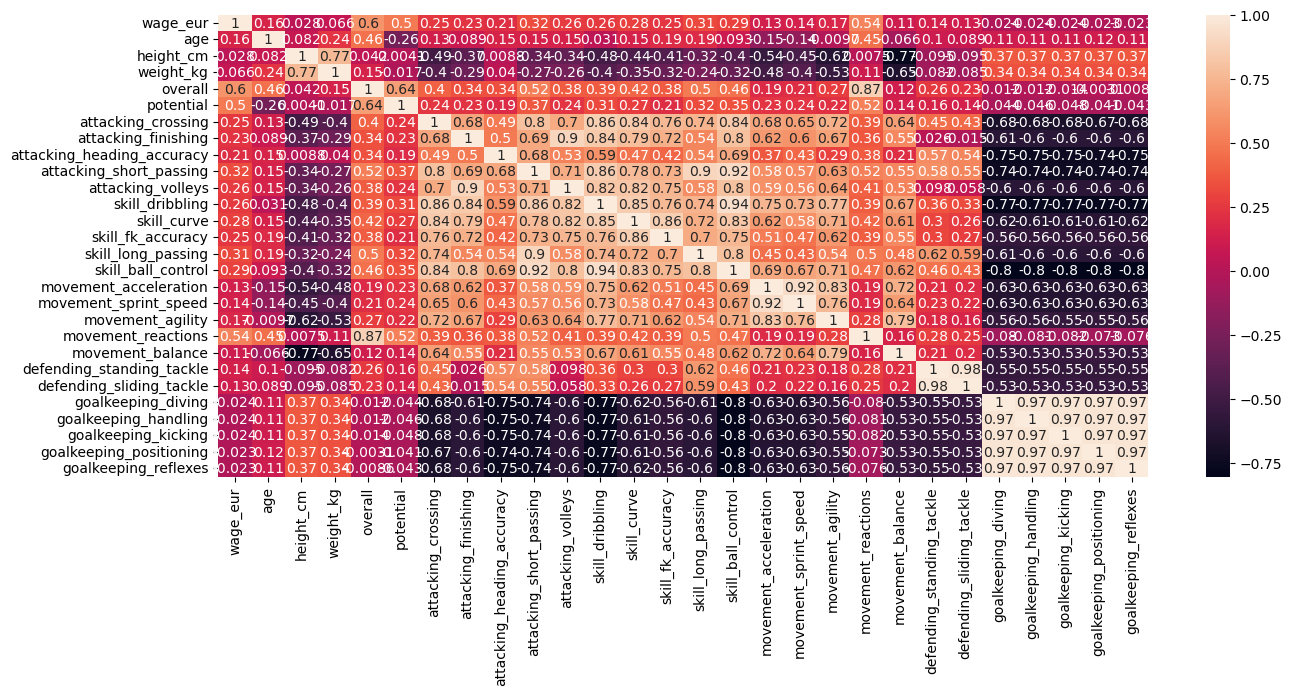

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [24]:
x = df.drop(["nationality_name", "wage_eur"],axis=1)
y = df["wage_eur"]

<Axes: xlabel='overall', ylabel='wage_eur'>

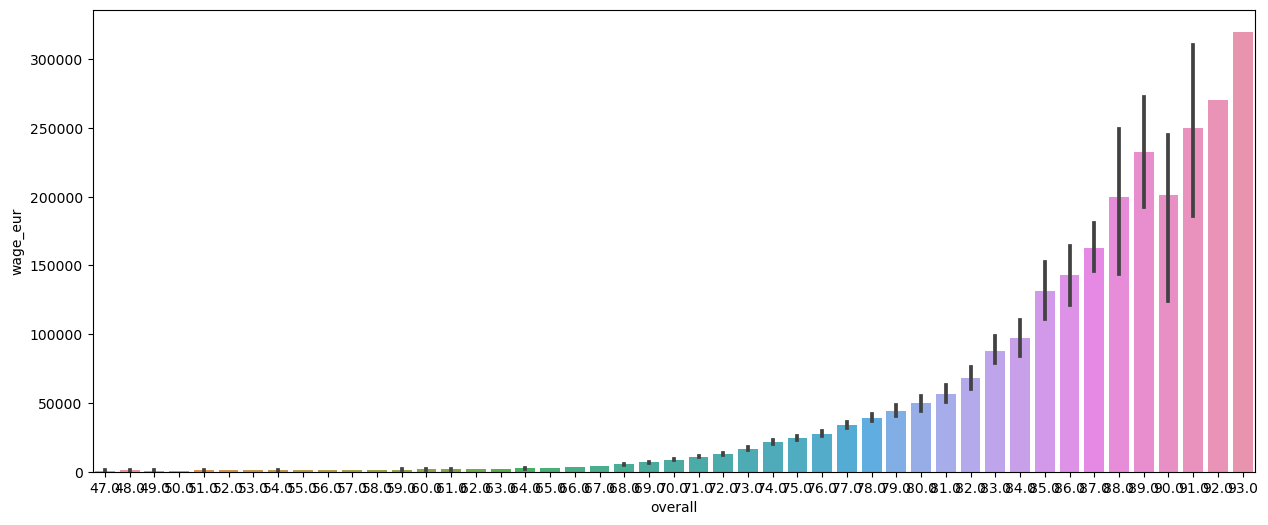

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["overall"],y=df["wage_eur"])

<Axes: xlabel='potential', ylabel='wage_eur'>

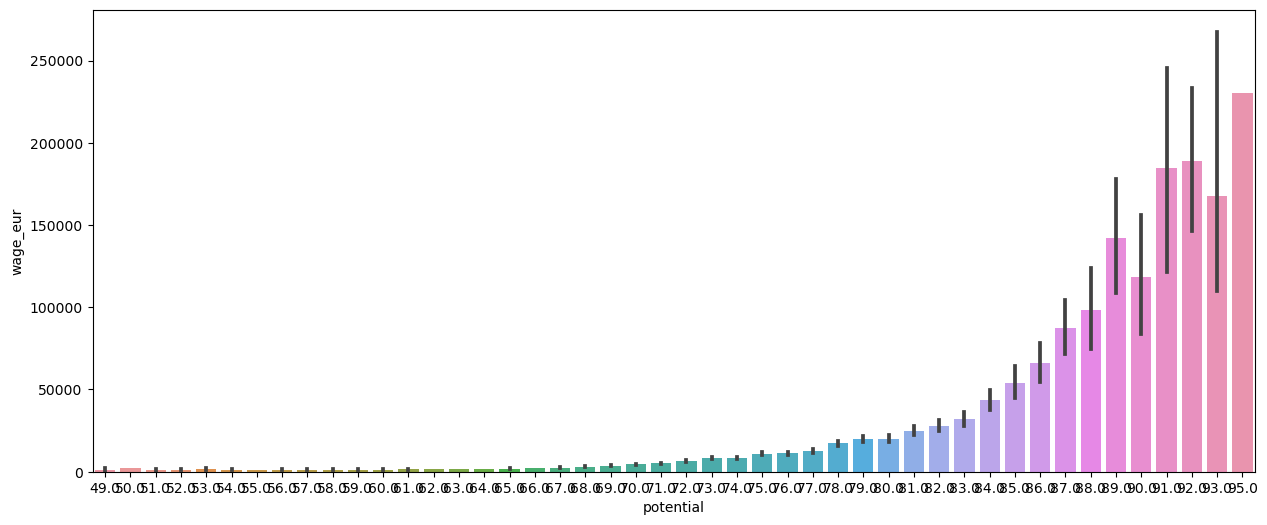

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["potential"],y=df["wage_eur"])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.394998666287509

In [32]:
model.score(x_test, y_test)

0.38448532708927496

In [33]:
poly = PolynomialFeatures(degree=2,include_bias=False)
new_x = poly.fit_transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    new_x, y, test_size=0.2, random_state=42
)

In [35]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.6964806114317562

In [36]:
model.score(x_test, y_test)


0.6748559334060821

In [37]:
poly = PolynomialFeatures(degree=3,include_bias=False)
new_x = poly.fit_transform(x)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    new_x, y, test_size=0.2, random_state=42
)

In [39]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8483534467123359

In [40]:
model.score(x_test, y_test)

0.6480440001578339

In [41]:
df.describe()

,wage_eur,age,height_cm,weight_kg,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,...,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000
mean,9017.989363,25.201168,181.288143,74.930493,65.760246,71.076442,49.568047,45.890239,51.773334,58.860726,...,63.505892,61.436907,64.078319,48.032433,45.890812,16.397278,16.187246,16.049067,16.221660,16.484722
std,19470.176724,4.746183,6.862150,7.065573,6.882432,6.089398,18.031017,19.718198,17.289443,14.488838,...,14.860439,9.042546,14.327970,21.227856,20.750015,17.561204,16.829124,16.555612,17.048276,17.873283
min,500.000000,16.000000,155.000000,49.000000,47.000000,49.000000,6.000000,2.000000,5.000000,7.000000,...,18.000000,25.000000,15.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1000.000000,21.000000,176.000000,70.000000,61.000000,67.000000,38.000000,30.000000,44.000000,54.000000,...,55.000000,56.000000,56.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3000.000000,25.000000,181.000000,75.000000,66.000000,71.000000,54.000000,50.000000,55.000000,62.000000,...,66.000000,62.000000,66.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,8000.000000,29.000000,186.000000,80.000000,70.000000,75.000000,63.000000,62.000000,64.000000,68.000000,...,74.000000,67.000000,74.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,350000.000000,54.000000,206.000000,110.000000,93.000000,95.000000,94.000000,95.000000,93.000000,94.000000,...,96.000000,94.000000,96.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000


<Axes: xlabel='wage_eur', ylabel='Count'>

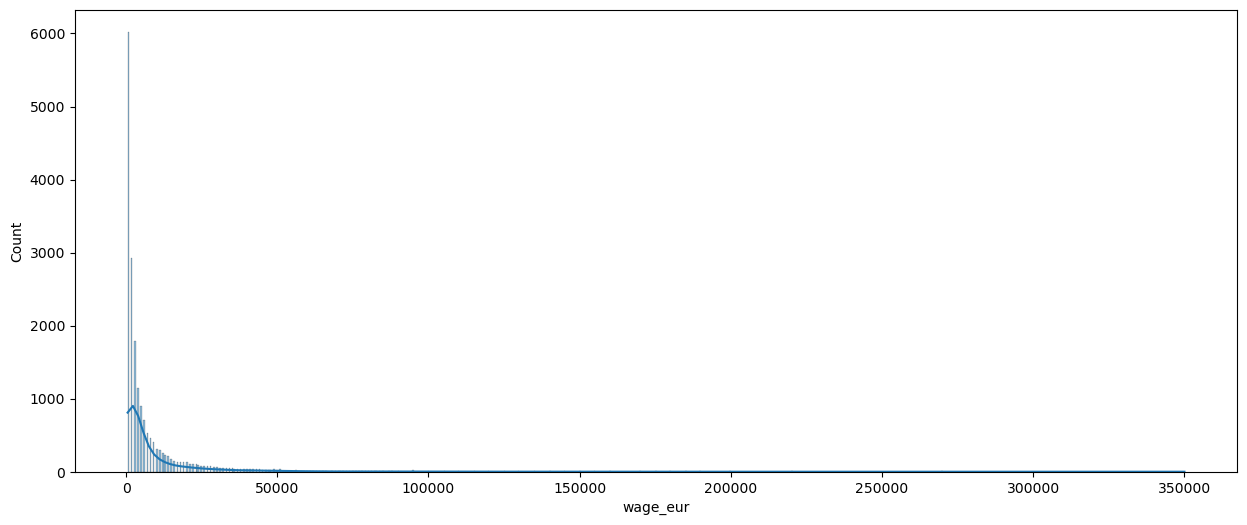

In [42]:
plt.figure(figsize=(15,6))
sns.histplot(df["wage_eur"],kde=True)

In [44]:
df = df[df["wage_eur"]<100000]

In [45]:
df.describe()

,wage_eur,age,height_cm,weight_kg,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,...,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000
mean,7710.542929,25.176768,181.286090,74.919245,65.593487,70.943497,49.398148,45.714068,51.655777,58.683186,...,63.399095,61.237900,64.002367,47.936395,45.814236,16.400621,16.189184,16.051662,16.224169,16.487111
std,12735.502906,4.747422,6.862126,7.060446,6.675028,5.941638,17.929870,19.606734,17.222352,14.390257,...,14.839724,8.822875,14.301853,21.170271,20.689513,17.532821,16.801102,16.536895,17.016526,17.843162
min,500.000000,16.000000,155.000000,49.000000,47.000000,49.000000,6.000000,2.000000,5.000000,7.000000,...,18.000000,25.000000,15.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1000.000000,21.000000,176.000000,70.000000,61.000000,67.000000,38.000000,30.000000,44.000000,54.000000,...,55.000000,56.000000,56.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3000.000000,25.000000,181.000000,75.000000,66.000000,71.000000,54.000000,50.000000,55.000000,62.000000,...,66.000000,62.000000,66.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,8000.000000,29.000000,186.000000,80.000000,70.000000,75.000000,63.000000,62.000000,64.000000,68.000000,...,74.000000,67.000000,74.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,95000.000000,54.000000,206.000000,110.000000,90.000000,91.000000,91.000000,89.000000,93.000000,92.000000,...,95.000000,89.000000,96.000000,90.000000,90.000000,88.000000,88.000000,91.000000,92.000000,88.000000


In [46]:
poly = PolynomialFeatures(degree=2,include_bias=False)
new_x = poly.fit_transform(x)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    new_x, y, test_size=0.2, random_state=42
)

In [48]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.6964806114317562

In [49]:
model.score(x_test, y_test)

0.6748559334060821

In [50]:
df.describe()

,wage_eur,age,height_cm,weight_kg,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,...,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000,19008.000000
mean,7710.542929,25.176768,181.286090,74.919245,65.593487,70.943497,49.398148,45.714068,51.655777,58.683186,...,63.399095,61.237900,64.002367,47.936395,45.814236,16.400621,16.189184,16.051662,16.224169,16.487111
std,12735.502906,4.747422,6.862126,7.060446,6.675028,5.941638,17.929870,19.606734,17.222352,14.390257,...,14.839724,8.822875,14.301853,21.170271,20.689513,17.532821,16.801102,16.536895,17.016526,17.843162
min,500.000000,16.000000,155.000000,49.000000,47.000000,49.000000,6.000000,2.000000,5.000000,7.000000,...,18.000000,25.000000,15.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1000.000000,21.000000,176.000000,70.000000,61.000000,67.000000,38.000000,30.000000,44.000000,54.000000,...,55.000000,56.000000,56.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3000.000000,25.000000,181.000000,75.000000,66.000000,71.000000,54.000000,50.000000,55.000000,62.000000,...,66.000000,62.000000,66.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,8000.000000,29.000000,186.000000,80.000000,70.000000,75.000000,63.000000,62.000000,64.000000,68.000000,...,74.000000,67.000000,74.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,95000.000000,54.000000,206.000000,110.000000,90.000000,91.000000,91.000000,89.000000,93.000000,92.000000,...,95.000000,89.000000,96.000000,90.000000,90.000000,88.000000,88.000000,91.000000,92.000000,88.000000
